<a href="https://colab.research.google.com/github/z3gh0st/Introduction-AI/blob/main/MNIST_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Beginning with tensorflow

In [ ]:
import sys
print(sys.version)

3.7.10 (default, May  3 2021, 02:48:31) 
[GCC 7.5.0]


In [ ]:
import tensorflow as tf
tf.__version__

'2.5.0'

import mnist

In [ ]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
type(x_train)

numpy.ndarray

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_train.ndim

3

In [ ]:
y_train.shape

(60000,)

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
x_train.dtype

dtype('float64')

Display MNIST

<function matplotlib.pyplot.show>

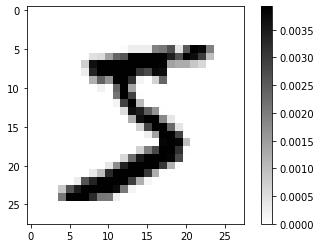

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(x_train[0], cmap='binary')
plt.colorbar() #pour la barre des couleur
plt.grid(False) #
plt.show

In [ ]:
x_train[0].shape

(28, 28)

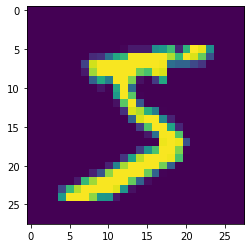

In [ ]:
plt.imshow(x_train[0])

Modele

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)), #28 * 28 = 784
    tf.keras.layers.Dense(256, activation='relu'), #784 * 128 = 100352 + 128 biais = 100 480
    #tf.keras.layers.Dropout(1,2) #je supprime le dropout qui à mon avis ne s'impose pas ici
    tf.keras.layers.Dense(10, activation='softmax') #(128 * 10) + 10 = 1290
])

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_15 (Dense)             (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.9916 - accuracy: 0.7602
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4122 - accuracy: 0.8885
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3408 - accuracy: 0.9038
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3103 - accuracy: 0.9108
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2909 - accuracy: 0.9163
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2752 - accuracy: 0.9200
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2623 - accuracy: 0.9240
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2494 - accuracy: 0.9276
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2365 - accuracy: 0.9315
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.224

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2211 - accuracy: 0.9381


[0.22108152508735657, 0.9380999803543091]

In [ ]:
test_predictions = model.predict(x_test)

In [ ]:
test_predictions.shape

(10000, 10)

In [ ]:
test_predictions[0]

array([4.0894822e-05, 1.8867834e-08, 5.2412281e-05, 1.5610573e-03,
       6.1471894e-07, 4.0820789e-05, 1.9209010e-09, 9.9724329e-01,
       1.2773978e-05, 1.0480692e-03], dtype=float32)

In [ ]:
import numpy as np
np.argmax(test_predictions[0])

7

In [ ]:
plt.figure()
plt.imshow(x_test[0], cmap='grey')
plt.colorbar() #
plt.grid(False) #
plt.